In [6]:
from app_util import ContextDetDemo
import os 
from PIL import Image
import pandas as pd
os.chdir("/home/dipak/Downloads/contextdet")

In [2]:
path = 'ckpt.pth'
contextdet_model = ContextDetDemo(resume=path)

/home/dipak/Downloads/contextdet/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dipak/Downloads/contextdet/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Position interpolate from 16x16 to 26x26
Missing Keys: ['llm_decoder.model.query_tokens', 'llm_decoder.model.visual_encoder.cls_token', 'llm_decoder.model.visual_encoder.pos_embed', 'llm_decoder.model.visual_encoder.patch_embed.proj.weight', 'llm_decoder.model.visual_encoder.patch_embed.proj.bias', 'llm_decoder.model.visual_encoder.blocks.0.norm1.weight', 'llm_decoder.model.visual_encoder.blocks.0.norm1.bias', 'llm_decoder.model.visual_encoder.blocks.0.attn.q_bias', 'llm_decoder.model.visual_encoder.blocks.0.attn.v_bias', 'llm_decoder.model.visual_encoder.blocks.0.attn.qkv.weight', 'llm_decoder.model.visual_encoder.blocks.0.attn.proj.weight', 'llm_decoder.model.visual_encoder.blocks.0.attn.proj.bias', 'llm_decoder.model.visual_encoder.blocks.0.norm2.weight', 'llm_decoder.model.visual_encoder.blocks.0.norm2.bias', 'llm_decoder.model.visual_encoder.blocks.0.mlp.fc1.weight', 'llm_decoder.model.visual_encoder.blocks.0.mlp.fc1.bias', 'llm_decoder.model.visual_encoder.blocks.0.mlp.fc2.weight

In [3]:
def do_product_identification_inference(path):
    task_button = 'Question Answering'
    image_input = Image.open(path)
    text_input = "What product image is this?"
    history = []
    image_vis, chat, history = contextdet_model.forward(image_input, text_input, task_button, history)
    return chat

/home/dipak/Downloads/contextdet/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


214376.jpg
[('What product image is this? Answer:', 'a cup')]
------------


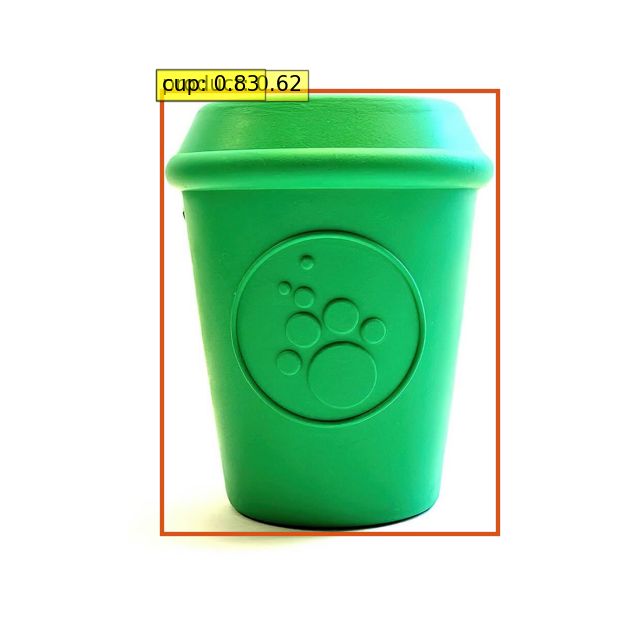

In [4]:
# images = os.listdir("test_set")
# for image in images:
#     path = os.path.join("test_set", image)
#     result = do_product_identification_inference(path)
#     print(image)
#     print(result)
#     print("------------")
#     break 

In [17]:
test_df = pd.DataFrame(columns=["image_name", "category", "product_name"])

In [18]:
MAIN_DIR_PATH = 'categories_images'
folders = os.listdir(MAIN_DIR_PATH)
for category in folders:
    category_dir_path = os.path.join(MAIN_DIR_PATH, category)
    images = os.listdir(category_dir_path)
    for image in images:
        image_path = os.path.join(category_dir_path, image)
        result = do_product_identification_inference(image_path)
        print(image, result)
        try:
            test_df.loc[len(test_df)+1, :] = image, category, result[0][1]
        except:
            test_df.loc[len(test_df)+1, :] = image, category, result
        test_df.to_csv("product_identification.csv", index=False)

30.jpeg [('What product image is this? Answer:', 'a santa hat')]
